In [4]:
import jax.numpy as jnp
import jax.scipy as jsp

In [12]:
def sparseify(x: jnp.ndarray, num_adjacent_nbs: int):
    x_copy = x.copy()
    for n in range(num_adjacent_nbs+1, len(x)-num_adjacent_nbs):
        # Set the elements at the diagonal `n` away from the main diagonal to zero
        x_copy -= jnp.diagflat(jnp.diag(x_copy, k=n), k=n)
        x_copy -= jnp.diagflat(jnp.diag(x_copy, k=-n), k=-n)
    return x_copy

In [13]:
x = jnp.arange(64).reshape(8, 8)
print(x)
print(sparseify(x, 1))
print(sparseify(x, 2))

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
[[ 0  1  0  0  0  0  0  7]
 [ 8  9 10  0  0  0  0  0]
 [ 0 17 18 19  0  0  0  0]
 [ 0  0 26 27 28  0  0  0]
 [ 0  0  0 35 36 37  0  0]
 [ 0  0  0  0 44 45 46  0]
 [ 0  0  0  0  0 53 54 55]
 [56  0  0  0  0  0 62 63]]
[[ 0  1  2  0  0  0  6  7]
 [ 8  9 10 11  0  0  0 15]
 [16 17 18 19 20  0  0  0]
 [ 0 25 26 27 28 29  0  0]
 [ 0  0 34 35 36 37 38  0]
 [ 0  0  0 43 44 45 46 47]
 [48  0  0  0 52 53 54 55]
 [56 57  0  0  0 61 62 63]]


In [16]:
import sys
sys.path.append('../../')

from sdebridge.utils import eval_Q, sample_ellipse
import matplotlib.pyplot as plt

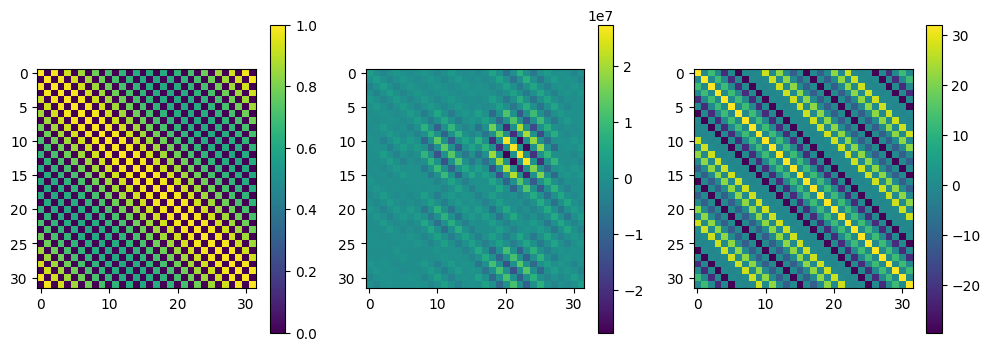

In [31]:
X = sample_ellipse(num_points=16, scale=0.5, shifts=jnp.array([0.0, 0.0]), a=1.0, b=1.0)
Q = eval_Q(X, alpha=1.0, sigma=1.0)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(Q)
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(jnp.linalg.inv(Q))
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(jnp.linalg.pinv(Q))
plt.colorbar()

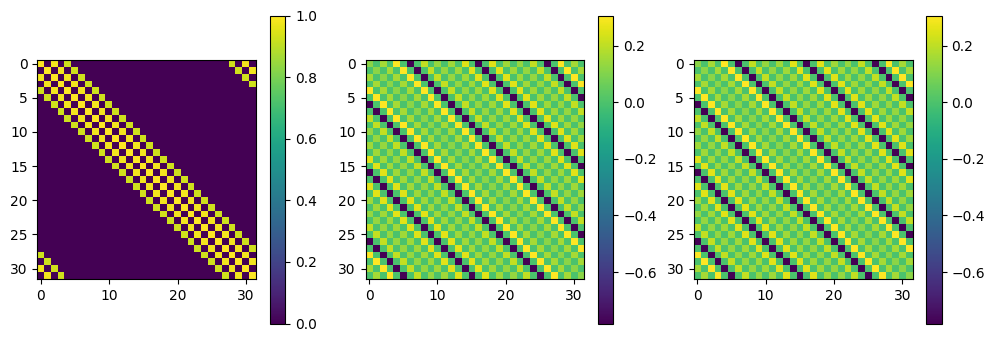

In [32]:
sparse_Q = sparseify(Q, num_adjacent_nbs=2*2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(sparse_Q)
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(jnp.linalg.inv(sparse_Q))
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(jnp.linalg.pinv(sparse_Q))
plt.colorbar()